Pobierz dane dotyczące scoringu kredytowego

*Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.*

**Zadanie na dziś: przygotować dane do modelu**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import danych

In [2]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-2-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


100%|██████████| 6.09M/6.09M [00:01<00:00, 6.19MB/s]


Extracting zip of train.csv...


/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

**Poznaj dane:**

1.   sprawdź wymiary i typy kolumn
2.   usuń duplikaty
3.   usuń zdbędne kolumny
4.   sprawdz liczbę braków danych w poszczególnych kolumnach






In [3]:
df.shape

(100000, 28)

In [4]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [6]:
df = df.drop_duplicates()

In [7]:
# Rozdzielanie wartości po przecinku i usuwanie zbędnych spacji
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ')
# Użycie MultiLabelBinarizer do One-Hot Encoding
mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_)

# Łączenie z oryginalnym DataFrame
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

TypeError: 'float' object is not iterable

In [8]:
missing_data = df.isnull().sum()
print("Liczba brakujących danych w poszczególnych kolumnach:")
print(missing_data)

Liczba brakujących danych w poszczególnych kolumnach:
ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [9]:
df = df.drop(['ID','Customer_ID','SSN','Name'], axis=1)

usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [10]:
FeaturesToConvert = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
for feature in FeaturesToConvert:
    df[feature] = df[feature].str.strip('-_')

for feature in FeaturesToConvert:
  df[feature] = df[feature].replace({'':np.nan})

Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [11]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

if df['Month'].dtype == 'object':
  df['Month'] = df['Month'].map(month_mapping)
  df['Month'].fillna(0, inplace=True)
  df['Month'] = df['Month'].astype(int)
else:
  print("Niepoprawny typ danych w kolumnie 'Month'.")


<ipython-input-11-e19374142497>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Month'].fillna(0, inplace=True)


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [12]:
label_encoder = LabelEncoder()
for column in ['Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix']:
    df[column] = label_encoder.fit_transform(df[column])


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'list']

Przelicz kolumne Credit_History_Age na liczbę mięsiecy


In [13]:
df[['years', 'months']] = df['Credit_History_Age'].str.extract(r'(\d+) years and (\d+) months')


df['years'] = pd.to_numeric(df['years'], errors='coerce')
df['months'] = pd.to_numeric(df['months'], errors='coerce')


df['Credit_History_Age_Months'] = (df['years'] * 12) + df['months']


df = df.drop(['years', 'months'], axis=1)

df = df.drop('Credit_History_Age', axis=1)


Zmien inne zmienne na numeryczne

Uzupełnij braki w kolumnie Monthly_Inhand_Salary,  Annual_Income, .. średnią

In [14]:
for col in ['Monthly_Inhand_Salary', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

<ipython-input-14-5a07e87d2a95>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [17]:
#Oblicz IQR dla kolumny Monthly_Inhand_salary
Q1_salary = df['Monthly_Inhand_Salary'].quantile(0.25)
Q3_salary = df['Monthly_Inhand_Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

#Określ granice wartości odstających
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

#Zastąp wartości odstające medianą
df['Monthly_Inhand_Salary'] = np.where((df['Monthly_Inhand_Salary'] < lower_bound_salary) | (df['Monthly_Inhand_Salary'] > upper_bound_salary),
                                      df['Monthly_Inhand_Salary'].median(), df['Monthly_Inhand_Salary'])

#Oblicz IQR dla kolumny Annual_Income
Q1_income = df['Annual_Income'].quantile(0.25)
Q3_income = df['Annual_Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

#Określ granice wartości odstających
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

#Zastąp wartości odstające medianą
df['Annual_Income'] = np.where((df['Annual_Income'] < lower_bound_income) | (df['Annual_Income'] > upper_bound_income),
                               df['Annual_Income'].median(), df['Annual_Income'])

Zbadaj korelacje między zmiennymi

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: setting an array element with a sequence.

In [26]:
#Pokaż korelacje między zmiennymi tylko jeśli są większe od 0.2

#Identify correlations greater than 0.2
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

#Plotting correlations greater than 0.6
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Coefficients > 0.2)')
plt.show()

ValueError: could not convert string to float: '_'

In [27]:
# Replace outliers in 'Age' with the mean
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric if not already
mean_age = df['Age'].mean()  # Calculate the mean age
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = mean_age  # Replace outliers with the mean

<ipython-input-27-18ef9351c29b>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '119.5097' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = mean_age  # Replace outliers with the mean


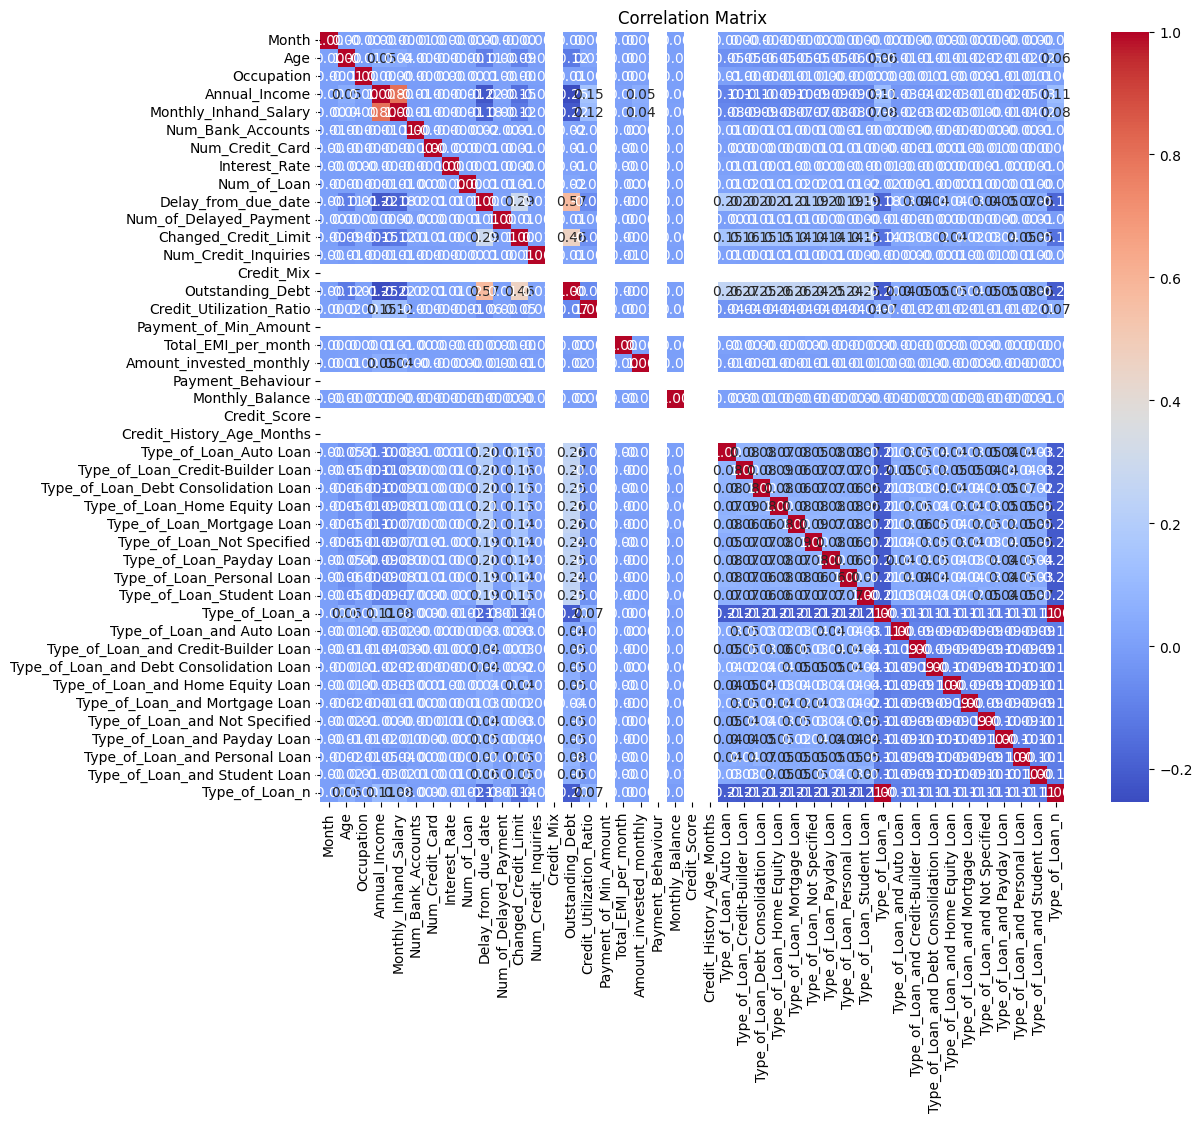

Highly Correlated Columns (Correlation > 0.3):
                                          Month  Age  Occupation  \
Month                                       1.0  NaN         NaN   
Age                                         NaN  1.0         NaN   
Occupation                                  NaN  NaN         1.0   
Annual_Income                               NaN  NaN         NaN   
Monthly_Inhand_Salary                       NaN  NaN         NaN   
Num_Bank_Accounts                           NaN  NaN         NaN   
Num_Credit_Card                             NaN  NaN         NaN   
Interest_Rate                               NaN  NaN         NaN   
Num_of_Loan                                 NaN  NaN         NaN   
Delay_from_due_date                         NaN  NaN         NaN   
Num_of_Delayed_Payment                      NaN  NaN         NaN   
Changed_Credit_Limit                        NaN  NaN         NaN   
Num_Credit_Inquiries                        NaN  NaN         NaN   
C

In [32]:
# Convert columns to numeric, replacing non-numeric values with NaN
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric.")
        # Handle non-numeric columns as needed, e.g., drop, replace, or encode

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify columns with correlations greater than 0.3
high_corr = corr_matrix[abs(corr_matrix) > 0.3]

# Print or display the highly correlated columns
print("Highly Correlated Columns (Correlation > 0.3):")
print(high_corr)

In [35]:
# Columns to be scaled
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                    'Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Outstanding_Debt', 'Credit_History_Age_Months',  # Assuming you renamed it
                    'Total_EMI_per_month', 'Monthly_Balance']

# Import MinMaxScaler if you haven't already
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [40]:
# 1. Select the numerical features for PCA
# Replace 'numerical_features' with the actual list of your numerical columns if needed
numerical_features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
                      'Delay_from_due_date', 'Num_of_Delayed_Payment',
                      'Outstanding_Debt', 'Credit_History_Age_Months',
                      'Total_EMI_per_month', 'Monthly_Balance']

# 2. Standardize the data
# PCA is sensitive to the scale of features, so it's crucial to standardize them
from sklearn.preprocessing import StandardScaler # Import StandardScaler here
scaler = StandardScaler()

# Before scaling, impute or remove NaN values from df[numerical_features]
# Option 1: Impute with the mean
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation
imputer = SimpleImputer(strategy='mean')

# Ensure all numerical_features are present in df
numerical_features = [f for f in numerical_features if f in df.columns]

# Fit and transform only on the existing columns
imputed_data = imputer.fit_transform(df[numerical_features])

# Assign the imputed data back to the DataFrame, using the correct columns
df[numerical_features] = imputed_data

# Option 2: Remove rows with NaN values
# df.dropna(subset=numerical_features, inplace=True)

# Now scale the data after handling NaNs
scaled_data = scaler.fit_transform(df[numerical_features])

# 3. Perform PCA with 90% variance explained
from sklearn.decomposition import PCA #Import PCA here
pca = PCA(n_components=0.90)  # Set n_components to the desired explained variance ratio
principal_components = pca.fit_transform(scaled_data)

# 4. Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Credit_History_Age_Months']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key

Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

Text(0.5, 1.0, 'Rozkład zmiennej Monthly_Balance')

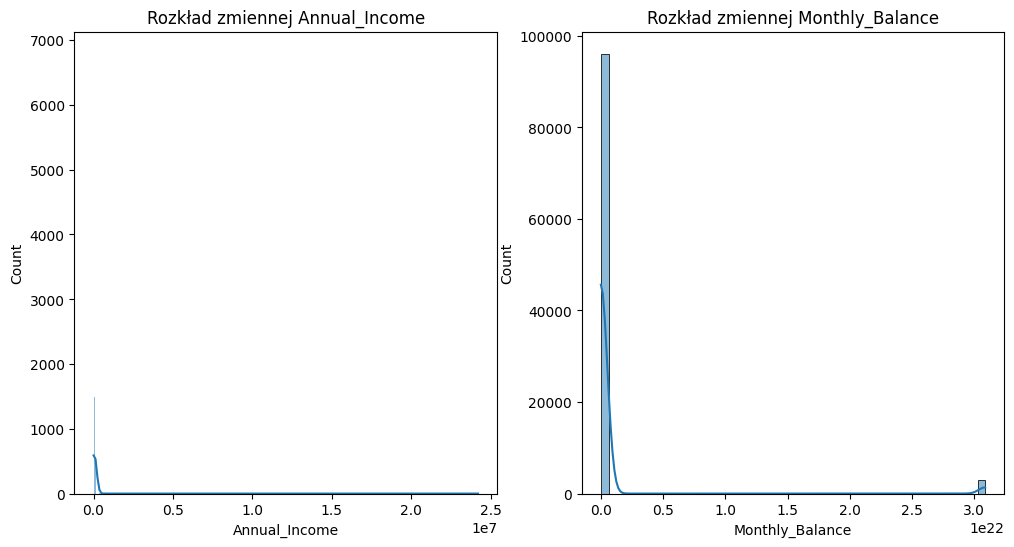

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual_Income'], kde=True)
plt.title('Rozkład zmiennej Annual_Income')

plt.subplot(1, 2, 2)
lower_bound = df['Monthly_Balance'].quantile(0.01)
upper_bound = df['Monthly_Balance'].quantile(0.99)


filtered_data = df['Monthly_Balance'][(df['Monthly_Balance'] >= lower_bound) & (df['Monthly_Balance'] <= upper_bound)]


sns.histplot(filtered_data, kde=True, bins=50)
plt.title('Rozkład zmiennej Monthly_Balance')

usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

Zwizualizuj korelacje między zmiennymi

Age ponizej 0 i jak jest 100 lat to niech bedzie srednia

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.loc[df['Age'] < 0, 'Age'] = np.nan
df.loc[df['Age'] > 100, 'Age'] = df['Age'].mean()